Ommatidiums Illuminated (center, red): [2, 3, 4]


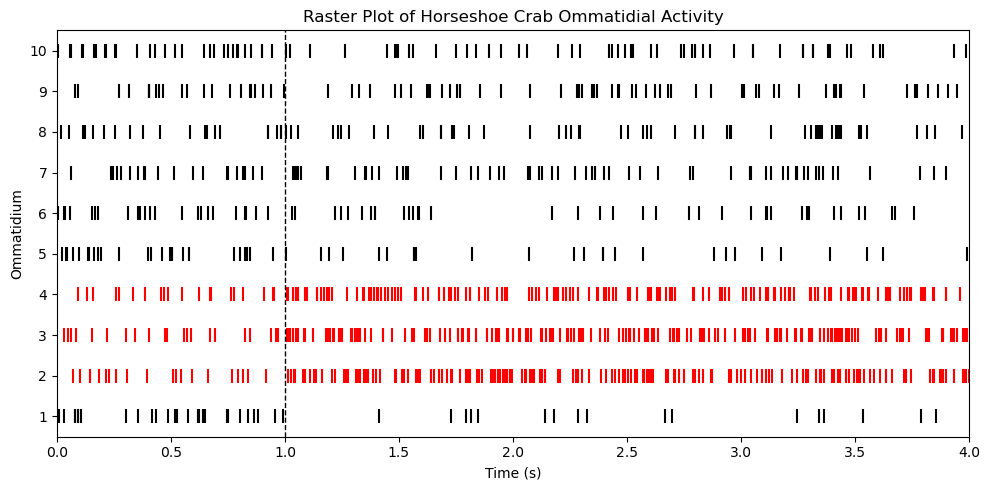

In [1]:
# Python code to simulate the horseshoe crab ommatidia system and produce a raster plot
# All spike marks are black except the three illuminated ommatidia, which are red.

import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Parameters define the amount of ommantidia and time of spike measurement included in the experimental model. This is important for the raster plot.
# ----------------------------
random.seed(42)
np.random.seed(42)

n_ommatidia = 10
t_start = 0.0
t_end = 4.0
stim_start = 1.0
bin_width = 0.5
bins = np.arange(t_start, t_end + 1e-9, bin_width)

basal_per_bin = 10  # basal spikes per 0.5s bin

# ----------------------------
# Choose the illuminated 3-ommatidium block
#These calculations show how lateral inhibition occurs without interneurons and that the inhibition decays the farther it travels from the orignal ommatidum.
# ----------------------------
leftmost = random.randint(1, 8)
central_block = [leftmost, leftmost + 1, leftmost + 2]

print(f"Ommatidiums Illuminated (center, red): {central_block}")

# ----------------------------
# Post-stimulus spike counts per bin per ommatidium in which the stimulus refers to the stimulus 
# ----------------------------
post_counts = [basal_per_bin] * (n_ommatidia + 1)

# Central triple → 3× firing
for idx in central_block:
    post_counts[idx] = basal_per_bin * 3  # 30

# Nearest neighbors of the ommatidium where stimulus originates → basal - ommatidium 6 (most affected by inhibition)
left_neighbor = leftmost - 1
right_neighbor = leftmost + 3

for neighbor in [left_neighbor, right_neighbor]:
    if 1 <= neighbor <= n_ommatidia:
        post_counts[neighbor] = max(0, basal_per_bin - 6)  # 4

# Next neighbors of the ommatidium where stimulus originates → basal - ommantidium 3
left_next = leftmost - 2
right_next = leftmost + 4

for neighbor in [left_next, right_next]:
    if 1 <= neighbor <= n_ommatidia:
        post_counts[neighbor] = max(0, basal_per_bin - 3)  # 7

# ----------------------------
# Generate spike trains for each ommmatidium which occur in response to light in one of the ommatidum which then inhibits the proximal ommatidia.
# ----------------------------
spike_times = {i: [] for i in range(1, n_ommatidia + 1)}

for b_index in range(len(bins) - 1):
    bin_t0 = bins[b_index]
    bin_t1 = bins[b_index + 1]
    pre_stim = (bin_t1 <= stim_start)

    for omm in range(1, n_ommatidia + 1):
        if pre_stim:
            # Draw at least basal_per_bin spikes
            n = np.random.poisson(lam=basal_per_bin)
            if n < basal_per_bin:
                n = basal_per_bin
        else:
            # Post-stimulus defined spike counts
            lam = post_counts[omm]
            n = np.random.poisson(lam=lam)

        if n > 0:
            times = np.random.uniform(low=bin_t0, high=bin_t1, size=n)
            spike_times[omm].extend(times)

# ----------------------------
# The Raster plot shows the three illuminated ommatidums and their inhibitory effects on nearby ommatida.The red spikes depict illuminated ommatidum.
# ----------------------------
plt.figure(figsize=(10, 5))

for omm in range(1, n_ommatidia + 1):
    times = np.array(spike_times[omm])
    yvals = np.ones_like(times) * omm

    # Color: red for central illuminated ommatidia, black for all others
    color = 'red' if omm in central_block else 'black'

    plt.scatter(times, yvals, marker='|', s=100, color=color)

plt.axvline(stim_start, linestyle='--', linewidth=1, color='black')
plt.xlim(t_start, t_end)
plt.ylim(0.5, n_ommatidia + 0.5)
plt.xlabel("Time (s)")
plt.ylabel("Ommatidium")
plt.yticks(range(1, n_ommatidia + 1))
plt.title("Raster Plot of Horseshoe Crab Ommatidial Activity")

plt.tight_layout()
plt.show()
